# H&M Dataset EDA

In this notebook, we load in the provided datasets for the H&M Personalized Fashion Recommendations Kaggle competition and will perform exploratory data analysis (EDA).

## Data Loading and Cleaning

### Required Libraries

NumPy and Pandas libraries will be used for loading and handling the data. Matplotlib and Seaborn will be used for data visualization purposes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

We being by loading in the articles and customers CSV files.

In [2]:
### Reading the CSV files from Kaggle API
# articles_df = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv')
# customers_df = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv')

### Reading the CSV file from local system
articles_df = pd.read_csv('data/articles.csv')
customers_df = pd.read_csv('data/customers.csv')

print(f'The articles dataset has {articles_df.shape[0]} rows and {articles_df.shape[1]} columns.')
print(f'The customers dataset has {customers_df.shape[0]} rows and {customers_df.shape[1]} columns.')

The articles dataset has 105542 rows and 25 columns.
The customers dataset has 1371980 rows and 7 columns.


### Articles CSV File

I will examine the articles data frame first.

In [3]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

The column names appear to be self-explanatory, but since an offical data dictionary has not been provided, it would be good to look at the distributions for each column to get a better idea of the type of information contained. While we could look at the histograms of all the numeric columns, the names of the numeric columns suggest that each numeric column is a label encoded version of a categorical column in the dataset (e.g. `product_type_no` and `product_type_name`, `graphical_appearance_no`, `graphical_appearance_name`). In addition all the numeric columns are of *int64* data type, suggesting they are discrete values. Hence I will look at bar plots of all the columns' value counts. 

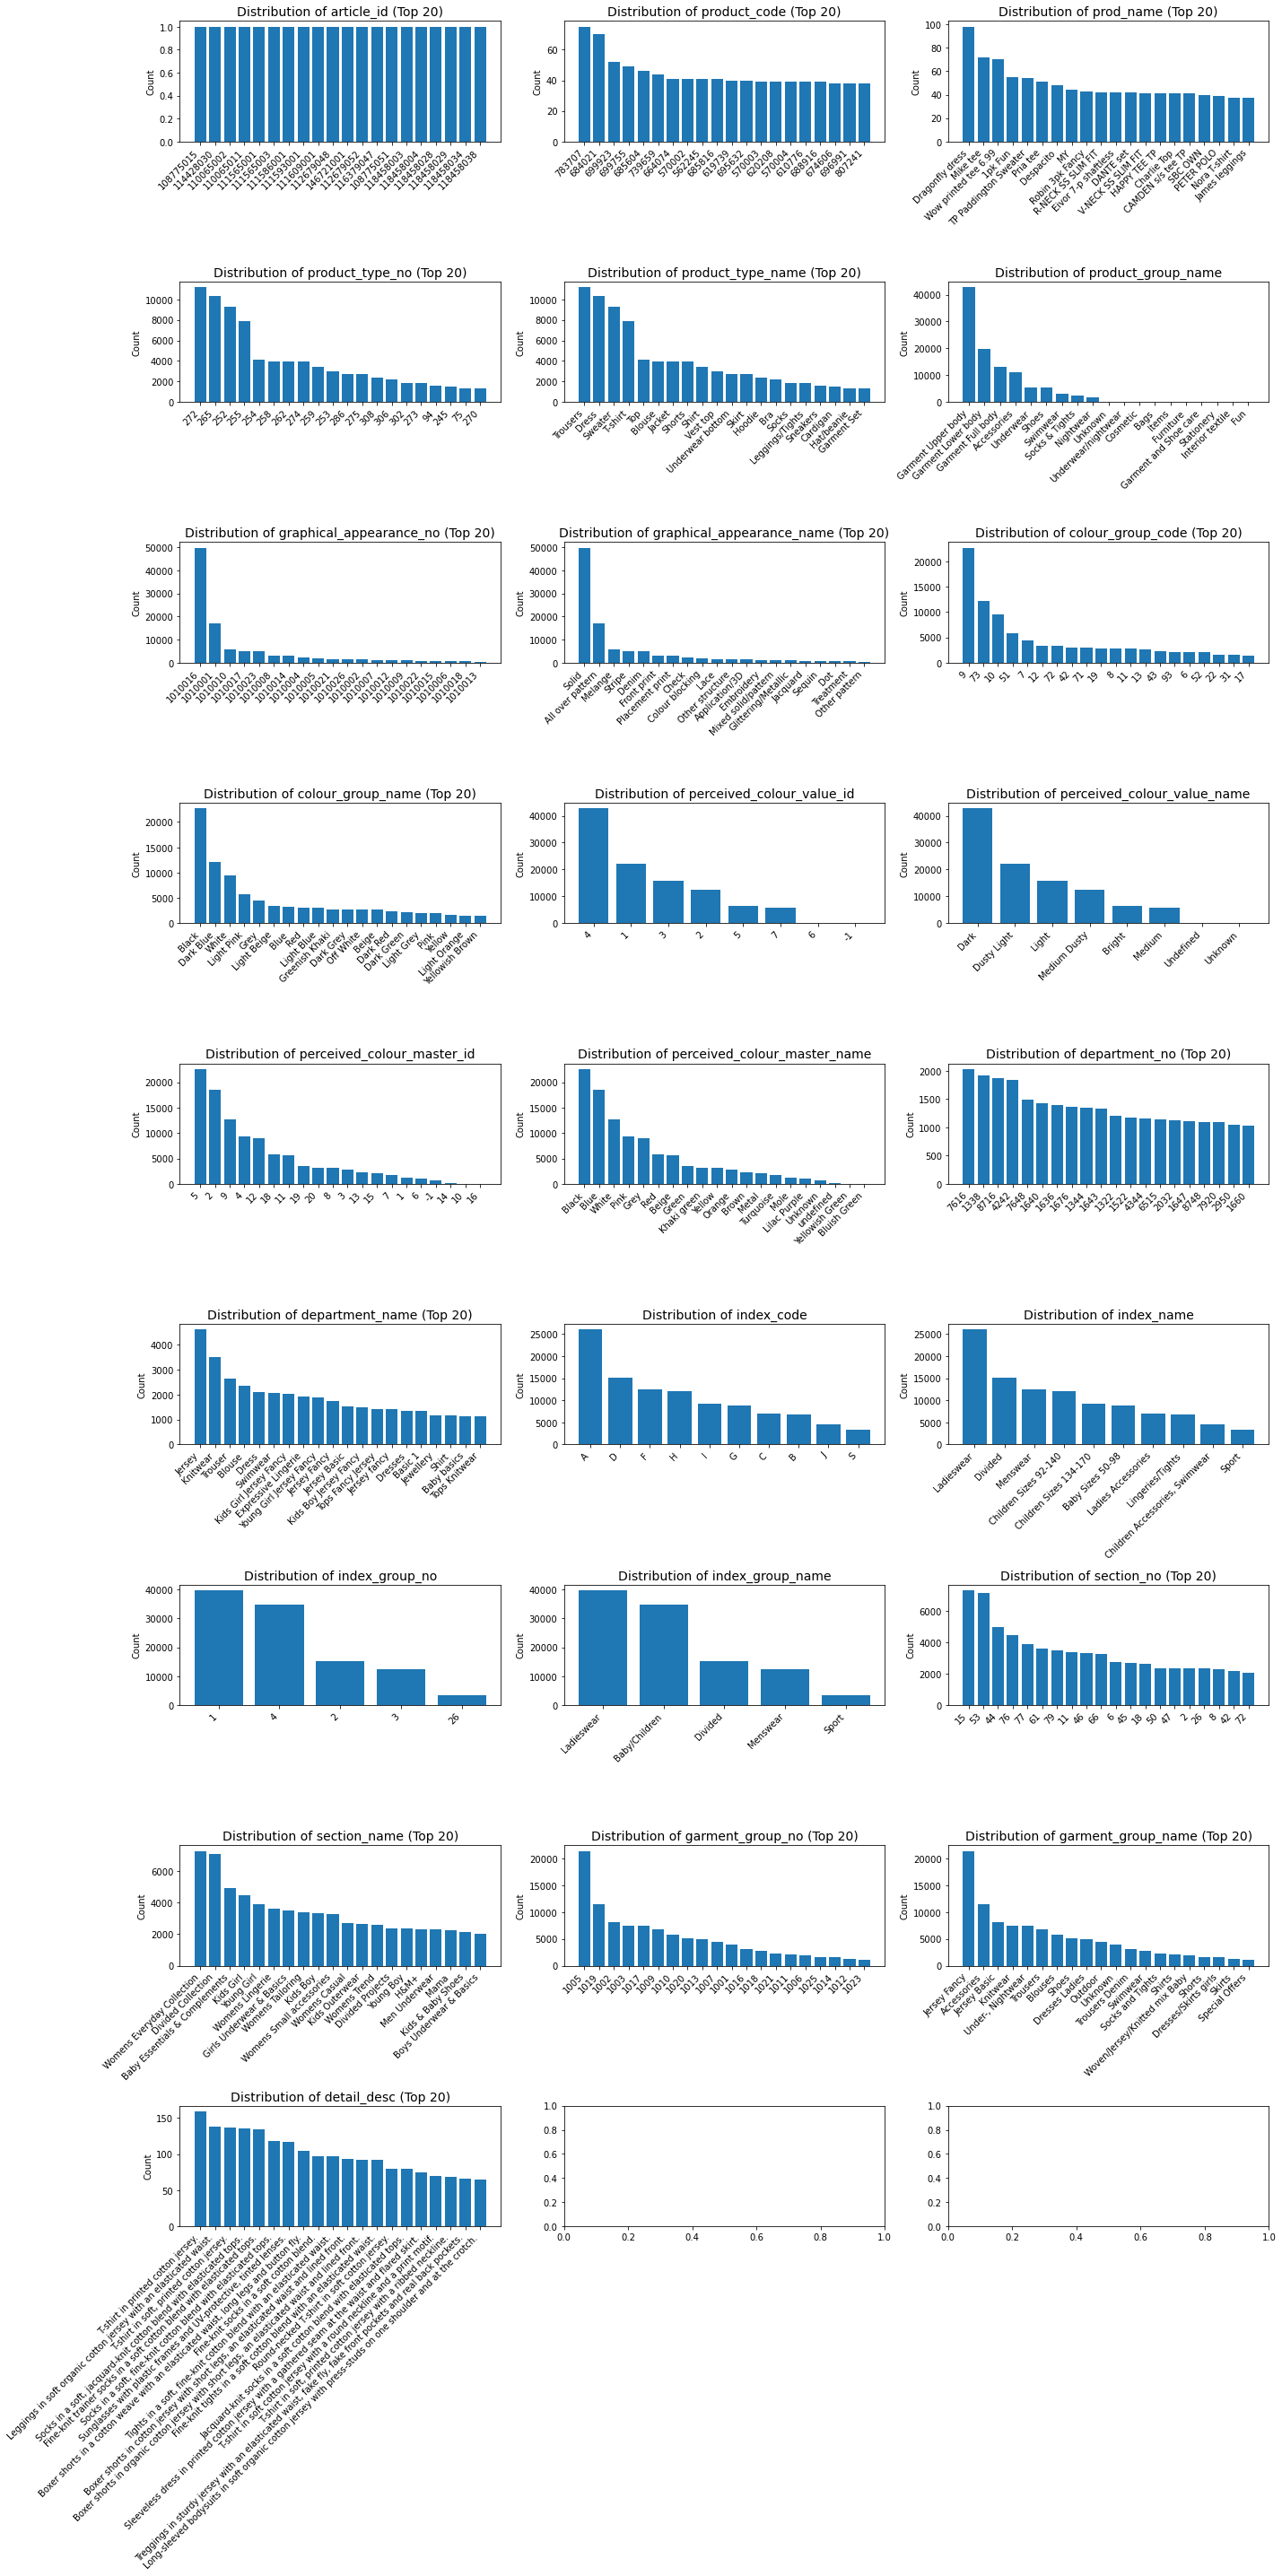

In [5]:
articles_cat_columns = articles_df.columns
num_cols = len(articles_cat_columns)

plot_cols = 3
plot_rows = int(np.ceil(num_cols / plot_cols))

plt.subplots(plot_rows, plot_cols, figsize=(20,40))

for i, col in enumerate(articles_cat_columns, start=1):
    plt.subplot(plot_rows, plot_cols, i)
    val_counts = articles_df[col].value_counts().sort_values(ascending=False)
    if val_counts.shape[0] <= 20:
        plt.bar(val_counts.index.astype('str'), val_counts)
        plt.title(f'Distribution of {col}', fontsize=14)
    else:
        plt.bar(val_counts[:20].index.astype('str'), val_counts[:20])
        plt.title(f'Distribution of {col} (Top 20)', fontsize=14)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

It appears my guess that apart from the `article_id` and `product_code` columns, the numeric columns are numeric representations of categorical columns.

In [6]:
round(articles_df.isna().sum()/articles_df.shape[0] * 100, 2).astype('str')+'%'

article_id                       0.0%
product_code                     0.0%
prod_name                        0.0%
product_type_no                  0.0%
product_type_name                0.0%
product_group_name               0.0%
graphical_appearance_no          0.0%
graphical_appearance_name        0.0%
colour_group_code                0.0%
colour_group_name                0.0%
perceived_colour_value_id        0.0%
perceived_colour_value_name      0.0%
perceived_colour_master_id       0.0%
perceived_colour_master_name     0.0%
department_no                    0.0%
department_name                  0.0%
index_code                       0.0%
index_name                       0.0%
index_group_no                   0.0%
index_group_name                 0.0%
section_no                       0.0%
section_name                     0.0%
garment_group_no                 0.0%
garment_group_name               0.0%
detail_desc                     0.39%
dtype: object

We can see that each article can has various metadata such as its product type, graphical appearance, colour group, perceived colour value, department, index, section, and garment group. The vast majority of articles have a detailed description, with the exception of 0.39% of our records.

### Customers CSV File

Let's look at the customers data frame and examine its contents.

In [7]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


While an official data dictionary was not provided, the competition host has clarified what some of the columns refer to in the comments to the [intorductory post](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/305952).

Hence the columns are as follows:

- `customer_id`: string object, the primary key for the customers data frame.
- `FN`: float, indicating if the customer receives a Fashion News newsletter. This could probably be a binary integer column.
- `Active`: float, indicating if the customer is active for communication. This could probably be a binary integer column.
- `club_member_status`: string object, indicating the customer's club membership status.
- `fashion_news_frequency`: string object, indicating the frequency at which the customer receives a Fashion News newsletter.
- `age`: float, the age of the customer.
- `postal_code`: string object, the postal code of the customer's address.

It appears there are many missing values from the dataset. I will look at the percentage of missing values from each column.

In [9]:
round(customers_df.isna().sum()/customers_df.shape[0] * 100, 2).astype('str')+'%'

customer_id                 0.0%
FN                        65.24%
Active                    66.15%
club_member_status         0.44%
fashion_news_frequency     1.17%
age                        1.16%
postal_code                 0.0%
dtype: object

There are many missing values from the `FN` and `Active` columns. We are also missing some values regarding club member status, Fashion News frequency, and age.

In [10]:
# customers_cat_columns = ['club_member_status', 'fashion_news_frequency']
# num_cols = len(customers_cat_columns)

# plot_cols = 2
# plot_rows = 1

# plt.subplots(plot_rows, plot_cols, figsize=(20, 3))

# for i, col in enumerate(customers_cat_columns, start=1):
#     plt.subplot(plot_rows, plot_cols, i)
#     val_counts = customers_df[col].value_counts()
#     if val_counts.shape[0] <= 20:
#         plt.bar(val_counts.index, val_counts)
#         plt.title(f'Distribution of {col}')
#     else:
#         plt.bar(val_counts[:20].index, val_counts[:20])
#         plt.title(f'Distribution of {col} (Top 20)')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45, ha='right')
    
# plt.tight_layout()
# plt.show()

In [11]:
# customers_num_columns = customers_df.select_dtypes(exclude='object').columns
# num_cols = len(customers_num_columns)

# plot_cols = 3
# plot_rows = 1

# plt.subplots(plot_rows, plot_cols, figsize=(20,3))

# for i, col in enumerate(customers_num_columns, start=1):
#     plt.subplot(plot_rows, plot_cols, i)
#     plt.hist(customers_df[col], bins=50)
#     plt.title(f'Distribution of {col}', fontsize=14)
#     plt.ylabel('Count')
#     #plt.xticks(rotation=45, ha='right')
    
# plt.tight_layout()
# plt.show()

Let's look at the value counts for the `Active` column.

In [12]:
customers_df['Active'].value_counts(dropna=False)

NaN    907576
1.0    464404
Name: Active, dtype: int64

The majority of values in this column are null values, while the rest are of value = 1 which indicates that the customer is active for communication. While we cannot verify this for sure, I will assume the null values correspond to customers who are not active for communication, and will replace this values with 0 to binarize the column.

In [13]:
customers_df['Active'].fillna(0, inplace=True)
customers_df['Active'] = customers_df['Active'].astype('uint8')

I might be able to impute missing values of the `FN` column based on information in the `fashion_news_frequency` column.

In [14]:
customers_df['FN'].value_counts(dropna=False)

NaN    895050
1.0    476930
Name: FN, dtype: int64

In [15]:
customers_df['fashion_news_frequency'].value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [16]:
customers_df[['FN', 'fashion_news_frequency']].value_counts(dropna=False)

FN   fashion_news_frequency
NaN  NONE                      876922
1.0  Regularly                 475310
NaN  NaN                        16009
     Regularly                   2106
1.0  Monthly                      829
     NONE                         789
NaN  Monthly                       13
1.0  None                           2
dtype: int64

There are missing `FN` values for customers that have a 'Monthly' or 'Regularly' frequency for receiving Fashion News. I will infer that these customers are in fact receiving Fashion News, and set these values to 1. Similarly, those that have 'None' as their Fashion News frequency should have an `FN` value of 0, since they do not receive a newsletter.

In [17]:
customers_df.loc[(customers_df['fashion_news_frequency']=='Regularly') \
                 | ((customers_df['fashion_news_frequency']=='Monthly')), 'FN'] = 1

customers_df.loc[(customers_df['fashion_news_frequency']=='None') \
                 | ((customers_df['fashion_news_frequency']=='NONE')), 'FN'] = 0

customers_df.loc[(customers_df['fashion_news_frequency']=='None'), 'fashion_news_frequency'] = 'NONE'

In [18]:
customers_df[['FN', 'fashion_news_frequency']].value_counts(dropna=False)

FN   fashion_news_frequency
0.0  NONE                      877713
1.0  Regularly                 477416
NaN  NaN                        16009
1.0  Monthly                      842
dtype: int64

Now only the rows with null values in the `FN` columns also have null values in the `fashion_news_frequency`. Since the majority of customers do not receive the newsletter, I will impute the missing values with the mode value - 0 for `FN`, 'NONE' for `fashion_news_frequency`.

In [19]:
customers_df.loc[customers_df['FN'].isna(), ['FN', 'fashion_news_frequency']] = [[0.0, 'NONE']]
customers_df['FN'] = customers_df['FN'].astype('uint8')

In [20]:
customers_df[['FN', 'fashion_news_frequency']].value_counts(dropna=False)

FN  fashion_news_frequency
0   NONE                      893722
1   Regularly                 477416
    Monthly                      842
dtype: int64

Let's take a look at the remaining missing values in the data frame.

In [21]:
round(customers_df.isna().sum()/customers_df.shape[0] * 100, 2).astype('str')+'%'

customer_id                0.0%
FN                         0.0%
Active                     0.0%
club_member_status        0.44%
fashion_news_frequency     0.0%
age                       1.16%
postal_code                0.0%
dtype: object

To impute the missing values of the `age` column, I will look at its distribution.

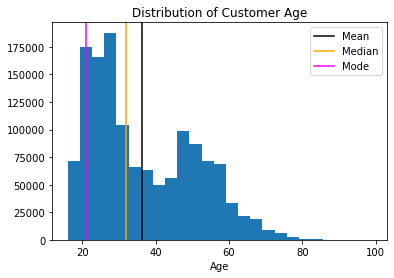

In [22]:
plt.figure()
plt.hist(customers_df['age'], bins=25)
plt.axvline(customers_df['age'].mean(), label='Mean', color='black')
plt.axvline(customers_df['age'].median(), label='Median', color='orange')
plt.axvline(customers_df['age'].mode()[0], label='Mode', color='magenta')
plt.legend()

plt.xlabel('Age')
plt.title('Distribution of Customer Age')
plt.show()

The distribution appears to be somewhat bimodal with a right-skewness. The mean, median, and mode are typical canddiates for imputation, but in this case the mean does not appear appropriate as the bimodal distribution centers the mean between the two peaks. The mode appears to be in the heaviest part of the distribution, hence I will impute with the mode value.

In [23]:
customers_df['age'].fillna(customers_df['age'].mode()[0], inplace=True)

In [24]:
round(customers_df.isna().sum()/customers_df.shape[0] * 100, 2).astype('str')+'%'

customer_id                0.0%
FN                         0.0%
Active                     0.0%
club_member_status        0.44%
fashion_news_frequency     0.0%
age                        0.0%
postal_code                0.0%
dtype: object

The final column with missing values is the `club_member_status` column. Let's look at its value counts.

In [25]:
round(customers_df['club_member_status'].value_counts(normalize=True) * 100, 2).astype('str')+'%'

ACTIVE        93.16%
PRE-CREATE     6.81%
LEFT CLUB      0.03%
Name: club_member_status, dtype: object

This is a categorical column. Since we do not have any other columns to infer member status, I will choose to impute the missing values with the mode value, which is the 'ACTIVE' status.

In [26]:
customers_df['club_member_status'].fillna(customers_df['club_member_status'].mode()[0], inplace=True)

In [27]:
round(customers_df.isna().sum()/customers_df.shape[0] * 100, 2).astype('str')+'%'

customer_id               0.0%
FN                        0.0%
Active                    0.0%
club_member_status        0.0%
fashion_news_frequency    0.0%
age                       0.0%
postal_code               0.0%
dtype: object

The customers data frame no longer contains any missing values.

### Transactions CSV File

I will now load in the transactions CSV file.

In [28]:
%%time

# transactions_df = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

transactions_df = pd.read_csv('data/transactions_train.csv')

print(f'The transactions dataset has {"{:,}".format(transactions_df.shape[0])} rows and {"{:,}".format(transactions_df.shape[1])} columns.')

The transactions dataset has 31,788,324 rows and 5 columns.
CPU times: user 22.3 s, sys: 2.06 s, total: 24.4 s
Wall time: 24.5 s


In [29]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [30]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


The data dictionary for this data frame is as floows:
- `t_dat`: string object, date of the trasaction.
- `customer_id`: string object, foreign key to the customers data frame.
- `article_id`: integer, foreign key to the articles data frame.
- `price`: float, scaled price of the item. According to the [competition host](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/306016), the data has been scaled for privacy reasons and the currency is not specified.
- `sales_channel_id`: integer, representing the sales channel. 1 represents a store purchase, 2 represents an online purchase.

According the [data description](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/data) on the competition page duplicate rows correspond to multiple purchases of the same item.

In [31]:
print(f'The articles dataset has {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns.')

The articles dataset has 31788324 rows and 5 columns.


In [32]:
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no missing values in the transactions data frame. I can now merge the transactions data frame with the articles data frame via a left join on the `article_id` key, followed by another left join with the customers data frame on the `customer_id` key. However, given that the transactions data frame is very large with over 30 million rows, I will not include the numeric columns from the customer data frame that include the same information as the categorical columns. 

In [38]:
%%time

cols_to_drop = articles_df.drop(['article_id', 'product_code'], axis=1).select_dtypes(exclude='object').columns

transactions_merged = transactions_df.merge(articles_df.drop(cols_to_drop, axis=1), how='left', on='article_id').\
                                      merge(customers_df, how='left', on='customer_id')

CPU times: user 32.6 s, sys: 19.2 s, total: 51.8 s
Wall time: 56.5 s


In [39]:
transactions_merged.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",0,0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",0,0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,1,1,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,685687,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,1,1,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,685687,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,1,1,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [40]:
transactions_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_name             object 
 8   product_group_name            object 
 9   graphical_appearance_name     object 
 10  colour_group_name             object 
 11  perceived_colour_value_name   object 
 12  perceived_colour_master_name  object 
 13  department_name               object 
 14  index_code                    object 
 15  index_name                    object 
 16  index_group_name              object 
 17  section_name                  object 
 18  garment_group_name  

In [ ]:
round(transactions_merged.isna().sum()/transactions_merged.shape[0] * 100, 2).astype('str')+'%'

## EDA

### Most Popular Product Types

In [74]:
%%time

transactions_merged['product_type_name'].value_counts()

CPU times: user 1.79 s, sys: 382 ms, total: 2.18 s
Wall time: 2.33 s


Trousers         4217017
Dress            3238428
Sweater          2783274
T-shirt          2203750
Top              1583408
                  ...   
Eyeglasses            25
Towel                 20
Bumbag                16
Toy                    5
Clothing mist          4
Name: product_type_name, Length: 130, dtype: int64

### Most Popular Product Groups

### Most Popular Colours

### Most Popular Sizes

### Product Popularity by age group

### Sales by Membership